# Lets Start the assignment with importing Pandas.

In [3]:
import pandas as pd

# First of all we will read and take the ones without prices.

In [5]:
df= pd.read_csv(r"E:\BEZEN\2022_02_08-02_30_31_AM.csv")

In [11]:
dfwop= df[df['price_string'].isna()]

In [12]:
dfwop

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NaN,NaN,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,NaN,NaN,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
16,7bad39f5-74b9-4611-afb9-46fb135190cd,NaN,NaN,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
13729992,8d763911-79b7-402d-8964-6bfe89692c66,NaN,NaN,TWVucyB3b3Jrd2Vhci8gb2ZmaWNlIHdlYXI,U2hpcnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729993,2dc182aa-d591-49e4-85d1-5c4a60a09664,NaN,NaN,U3BpY2Vz,UGVwcGVy,Z3JvY2VyaWVz
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz


In [14]:
dfwop.describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,8220000,0,70000,8210000,8180000,8210000
unique,822,0,7,278,476,13
top,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,Current price: \n$359.00,V29tZW5zIHN3aW13ZWFy,Rm9ybWFsIFN1aXRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,10000,NaN,10000,140000,60000,2050000


# The unique UUIDs are 822 without prices, so the products should be 822.

## Lets move ahead for counting individual values.

In [21]:
uniqueprodlist=dfwop["product_type"].dropna().unique() #Taking unique list of names for product type.

In [22]:
len(uniqueprodlist)#number of product-type

278

In [38]:
def countvalue(dataf,li):    #A function that counts and converts to the dictionary.
    nandic=dict()
    for i in li:
        nandic[i]=dataf.value_counts()[i]
    return nandic

In [26]:
nanproddic=countvalue(dfwop["product_type"],uniqueprodlist) #Counting using the function.

In [27]:
len(nanproddic)

278

In [28]:
dfnanprod = pd.DataFrame(list(nanproddic.items()), columns = ['Product','Count']) #converting to dataframe.

In [30]:
dfnanprod.to_excel(r"E:\BEZEN\Producttypewithoutprices.xlsx") #saving as a excel file.

## Lets repeat this two more time for no prices.

In [49]:
uniquecatlist=dfwop["category"].dropna().unique()
nancatdic=countvalue(dfwop["category"],uniquecatlist)
dfnancat = pd.DataFrame(list(nancatdic.items()), columns = ['category','Count'])

In [50]:
dfnancat.to_excel(r"E:\BEZEN\categorywithoutprices.xlsx")

In [51]:
uniquecatlist=dfwop["level_1"].dropna().unique()
nancatdic=countvalue(dfwop["level_1"],uniquecatlist)
dfnancat = pd.DataFrame(list(nancatdic.items()), columns = ['level_1','Count'])
dfnancat.to_excel(r"E:\BEZEN\level_1withoutprices.xlsx")

# Now lets take up the products with prices.

In [95]:
dfwp= df.dropna(subset=['price_string'])

In [96]:
len(dfwp)

5510000

# Lets do the same in one go.

In [98]:
for i in ["category","level_1","product_type"]:
    uniquecatlist=dfwp[i].dropna().unique()
    nancatdic=countvalue(dfwp[i],uniquecatlist)
    dfnancat = pd.DataFrame(list(nancatdic.items()), columns = [i,'Count'])
    dfnancat.to_excel(r"E:\BEZEN\{}withprices.xlsx".format(i))

# Checking for the dollar char .

In [108]:
dfwp=dfwp[dfwp["price_string"].str.contains("$")]

In [109]:
len(dfwp) #Equal to the privious one so all the prices have dollar sign.

5510000

In [62]:
dfwp["price_string"] 

2            $19.95
3            $92.00
4             11.50
6            $24.99
7           $148.00
             ...   
13729987     $32.99
13729989     $34.00
13729994     $86.00
13729996     $69.99
13729999     $55.00
Name: price_string, Length: 5510000, dtype: object

## Converting float values from prices.

In [110]:
dfwp["Price Value"] = df["price_string"].astype('str').str.extract("([-+]?\d*\.\d+|\d+)").astype(float)

In [111]:
dfwp["Currency"]="$"

# Required Values of prices and currency are:

In [69]:
dfwp

,uuid,price_string,price_string_unf,product_type,level_1,category,Price Value,Currency
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,19.95,$
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,92.00,$
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,11.50,$
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,NaN,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,24.99,$
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,NaN,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,148.00,$
...,...,...,...,...,...,...,...,...
13729987,e12c3fe8-2987-4e95-93b2-14e173d8028a,$32.99,NaN,UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw,UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw,SGVhbHRo,32.99,$
13729989,544416c3-4845-4427-b27b-d3ca9beca970,$34.00,NaN,U3Vuc2NyZWVu,VmVnYW4gU3Vuc2NyZWVu,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.00,$
13729994,f0ec31d4-3283-4931-af8b-6fb9fdb8b1aa,$86.00,NaN,RmFjaWFsIENsZWFuc2Vycw,TWlsayBDbGVhbnNlcg,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,86.00,$
13729996,fcaedae7-dc20-4da1-b4ae-77368c973088,$69.99,NaN,Um9vbSBkZWNvcg,UGxhbnRlcnMvVmFzZXM,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,69.99,$


In [74]:
dfwp.to_csv(r"E:\BEZEN\seperatepricesandcurrency.csv")

# Lets move on to the average prices of categories.

In [112]:
dfwp=dfwp[["category","Price Value"]] #taking just the required columns.

In [81]:
uniquecatlist=dfwp["category"].dropna().unique() #again making unique list of categories with prices.

In [84]:
uniquecatlist #enlisting them

array(['SGVhbHRo', 'YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl',
       'a2l0Y2hpbmcgYW5kIGRpbmluZw', 'SG91c2Vob2xkIGFuZCBDbGVhbmluZw',
       'Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz', 'VG95cyBhbmQgR2FtZXM',
       'QXJ0IHN1cHBsaWVz', 'Z3JvY2VyaWVz',
       'VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ', 'b2ZmaWNlIHByb2R1Y3Rz',
       'QmFieWNhcmU', 'cGV0IHN1cHBsaWVz', 'RWxlY3Ryb25pY3M'], dtype=object)

In [89]:
avg=dfwp.groupby("category")["Price Value"].mean() #to calculate mean of groups
catdic=dict()
for i in uniquecatlist:
    catdic[i]=avg.loc[i]

In [91]:
dfavgcat=pd.DataFrame(list(catdic.items()), columns = ['Category','Avg-Price']) #making df.

In [92]:
dfavgcat["Currency"]="$"

# Required categories and respective average prices.

In [93]:
dfavgcat

,Category,Avg-Price,Currency
0,SGVhbHRo,32.557586,$
1,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.745067,$
2,a2l0Y2hpbmcgYW5kIGRpbmluZw,16.703235,$
3,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,76.199000,$
4,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,125.413871,$
5,VG95cyBhbmQgR2FtZXM,32.448947,$
6,QXJ0IHN1cHBsaWVz,19.471053,$
7,Z3JvY2VyaWVz,10.541667,$
8,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,82.223500,$
9,b2ZmaWNlIHByb2R1Y3Rz,20.480000,$


In [94]:
dfavgcat.to_excel(r"E:\BEZEN\categorywithavgprice.xlsx")

# Something for getting the brownies ......

In [99]:
#importing the modules for plotting.
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
dfavgcat #first take the categories and average prices.

,Category,Avg-Price,Currency
0,SGVhbHRo,32.557586,$
1,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.745067,$
2,a2l0Y2hpbmcgYW5kIGRpbmluZw,16.703235,$
3,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,76.199000,$
4,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,125.413871,$
5,VG95cyBhbmQgR2FtZXM,32.448947,$
6,QXJ0IHN1cHBsaWVz,19.471053,$
7,Z3JvY2VyaWVz,10.541667,$
8,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,82.223500,$
9,b2ZmaWNlIHByb2R1Y3Rz,20.480000,$


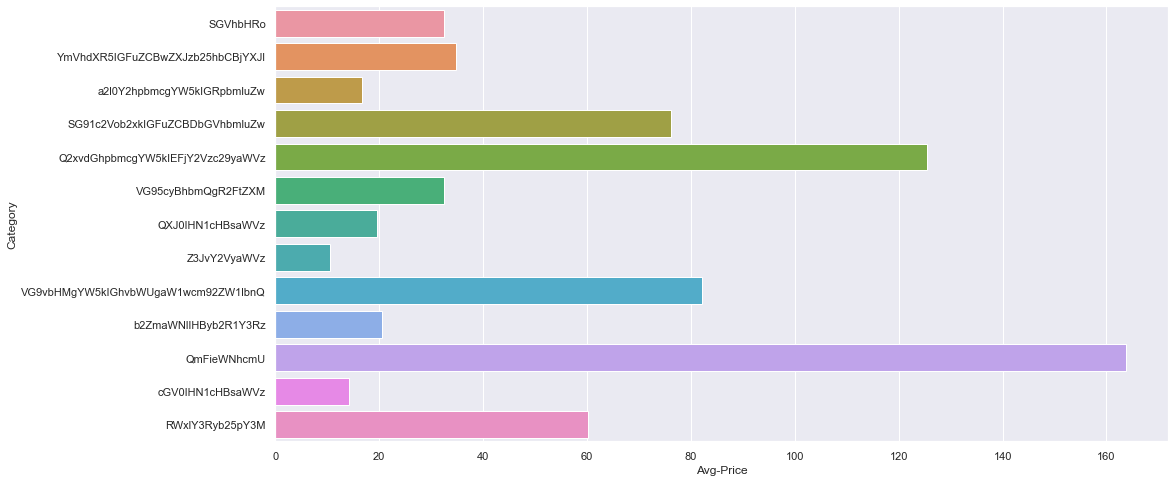

In [119]:
sns.set(rc={"figure.figsize":(16, 8)}) #setting size of the plot.
plot1=sns.barplot(y = dfavgcat["Category"], x = dfavgcat["Avg-Price"])

In [121]:
plot1.figure.savefig(r"E:\BEZEN\output1.png") #saving the graph as output.

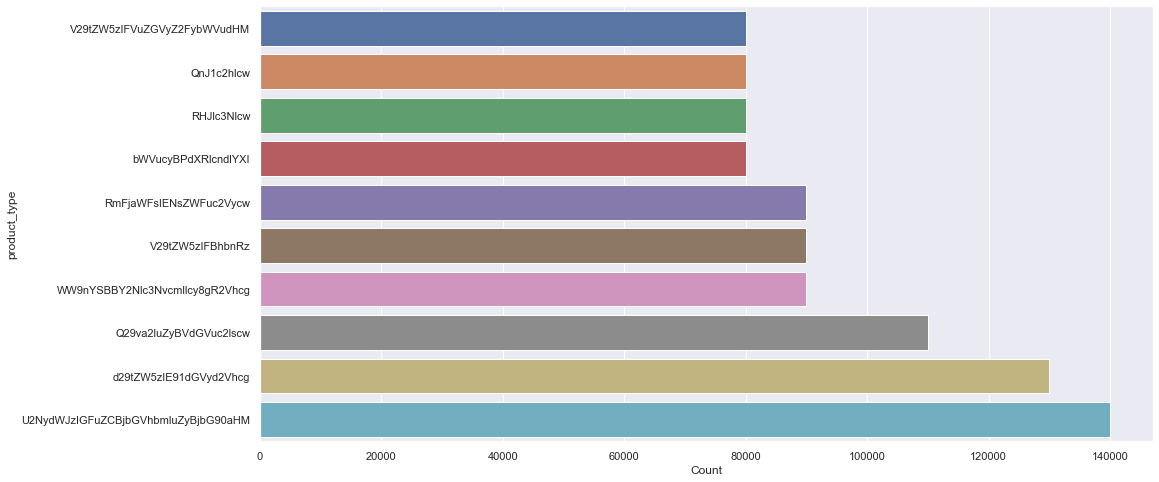

In [122]:
dfbar=dfnancat.sort_values(by=['Count']).tail(10)
plot2=sns.barplot(y = dfbar["product_type"], x = dfbar["Count"])

In [123]:
plot2.figure.savefig(r"E:\BEZEN\output2.png")

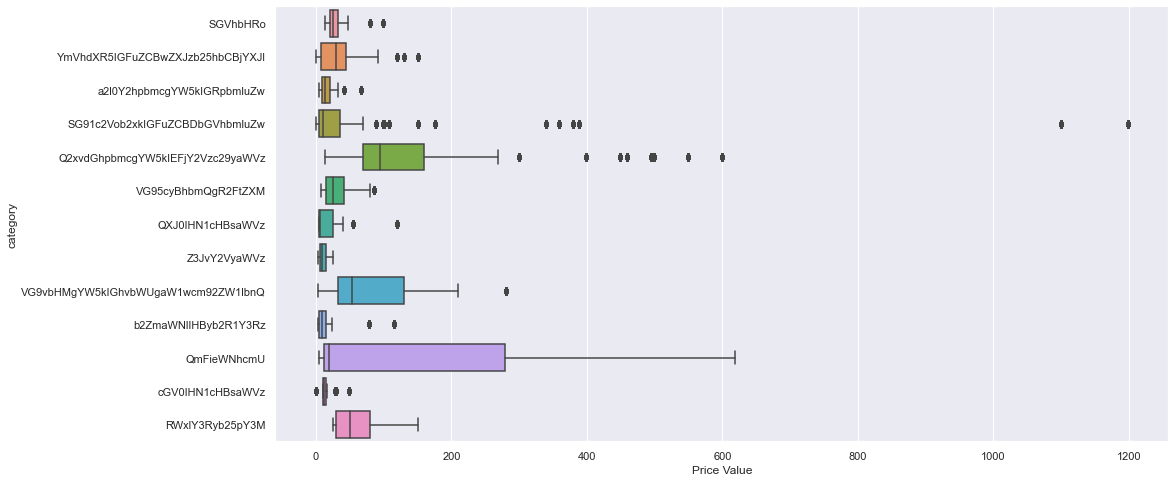

In [124]:
plot3=sns.boxplot(x = dfwp["Price Value"], y = dfwp["category"]) #plotting the categories with prices.

In [125]:
plot3.figure.savefig(r"E:\BEZEN\output3.png")